In [1]:
import pandas as pd

data = pd.read_csv("screentime_analysis.csv")

data.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [2]:
data.describe()

,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000


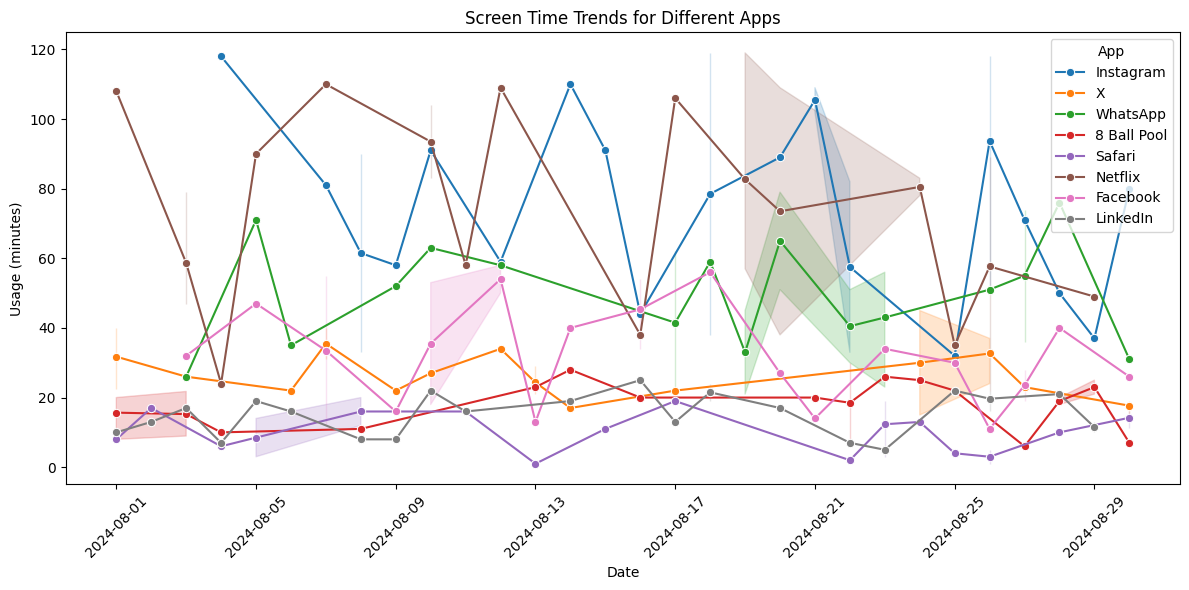

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Date'] = pd.to_datetime(data['Date'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Usage (minutes)', hue='App', data=data, marker="o")
plt.title('Screen Time Trends for Different Apps')
plt.ylabel('Usage (minutes)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

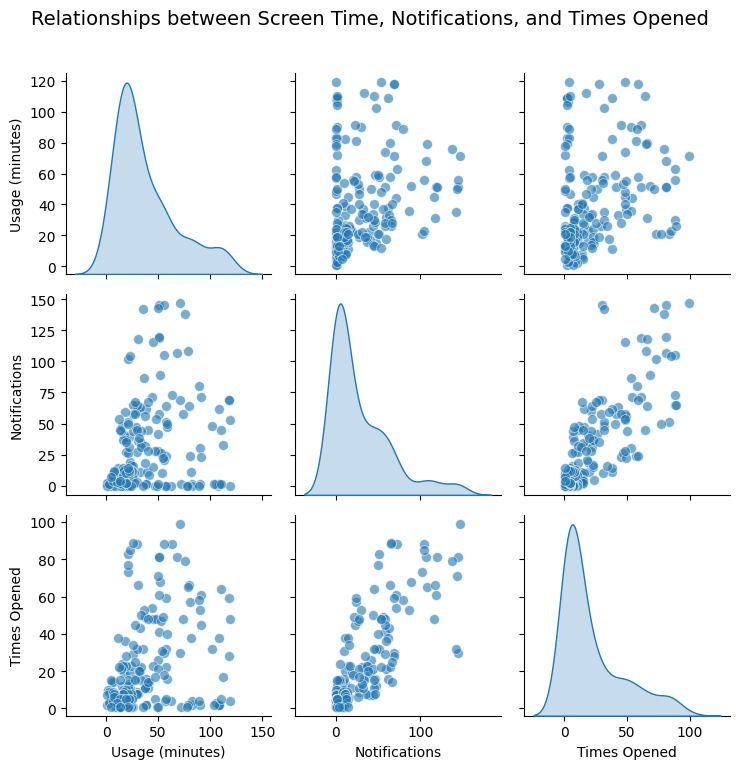

In [4]:
plt.figure(figsize=(8, 6))

pairplot = sns.pairplot(
    data[['Usage (minutes)', 'Notifications', 'Times Opened']], 
    kind="scatter", 
    diag_kind="kde",  
    plot_kws={'alpha':0.6, 's':50}  
)

pairplot.fig.suptitle('Relationships between Screen Time, Notifications, and Times Opened', y=1.02, fontsize=14)

plt.tight_layout()

plt.show()

In [5]:
app_analysis = data.groupby('App').agg(
    avg_usage=('Usage (minutes)', 'mean'),
    avg_notifications=('Notifications', 'mean'),
    avg_times_opened=('Times Opened', 'mean')
).reset_index()

app_analysis = app_analysis.sort_values(by='avg_usage', ascending=False)

app_analysis

,App,avg_usage,avg_notifications,avg_times_opened
2,Instagram,75.92,49.80,41.56
4,Netflix,72.76,0.44,2.56
6,WhatsApp,48.16,99.92,68.24
1,Facebook,33.68,39.72,30.20
7,X,27.00,25.84,13.16
0,8 Ball Pool,18.08,4.52,7.28
3,LinkedIn,15.60,8.92,4.76
5,Safari,10.80,0.72,5.28


C:\Users\soura\AppData\Local\Temp\ipykernel_9440\2535153419.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=weekly_usage.index, y=weekly_usage.values, palette="crest")


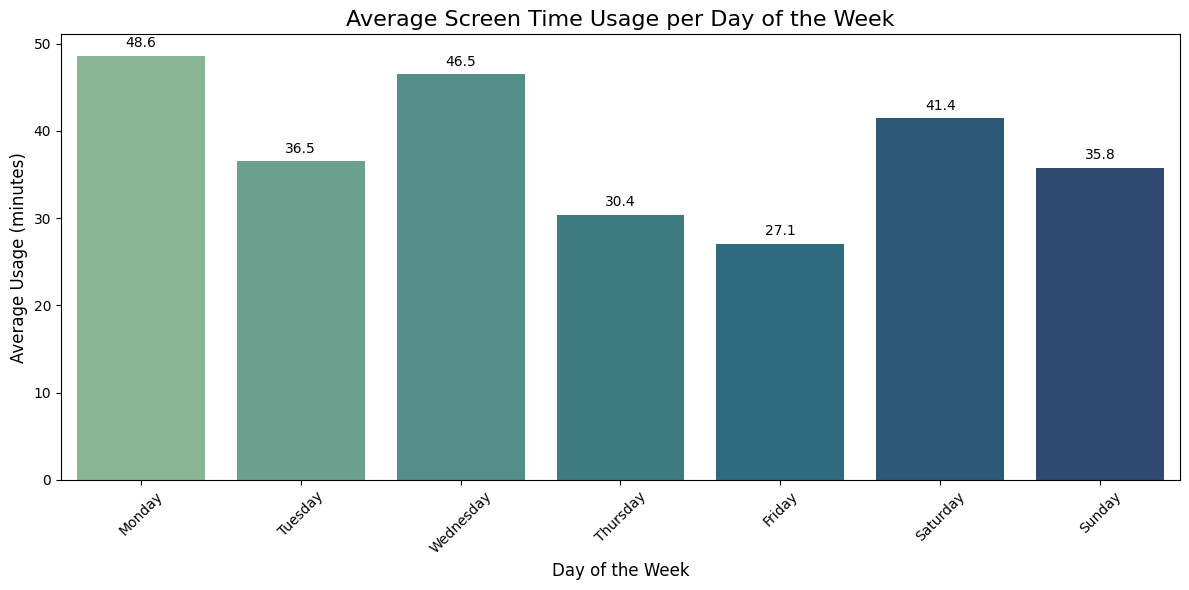

In [6]:
data['Day of Week'] = data['Date'].dt.day_name()

weekly_usage = data.groupby('Day of Week')['Usage (minutes)'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=weekly_usage.index, y=weekly_usage.values, palette="crest")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

plt.title('Average Screen Time Usage per Day of the Week', fontsize=16)
plt.ylabel('Average Usage (minutes)', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

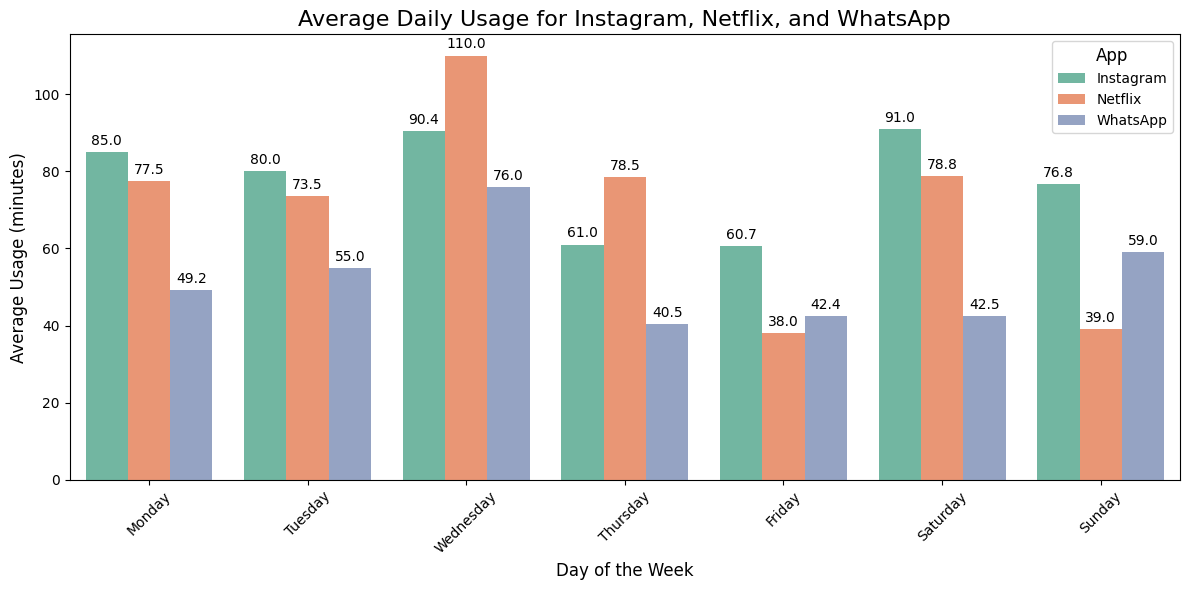

In [7]:
top_apps_data = data[data['App'].isin(['Instagram', 'Netflix', 'WhatsApp'])]

daily_app_usage = top_apps_data.groupby(['App', 'Day of Week'])['Usage (minutes)'].mean().reindex(
    pd.MultiIndex.from_product([['Instagram', 'Netflix', 'WhatsApp'], 
                                ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
                               names=['App', 'Day of Week'])).reset_index()

plt.figure(figsize=(12, 6))

ax = sns.barplot(x='Day of Week', y='Usage (minutes)', hue='App', data=daily_app_usage, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 8), textcoords='offset points')

plt.title('Average Daily Usage for Instagram, Netflix, and WhatsApp', fontsize=16)
plt.ylabel('Average Usage (minutes)', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='App', fontsize=10, title_fontsize=12)

plt.tight_layout()
plt.show()

In [8]:
notifications_data = data[data['Notifications'] > 0]

app_opened_when_notif = notifications_data.groupby('App').apply(
    lambda x: (x['Times Opened'] > 0).sum() / len(x)
).reset_index(name='Probability of Open with Notification')

app_opened_when_notif

C:\Users\soura\AppData\Local\Temp\ipykernel_9440\3040255173.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  app_opened_when_notif = notifications_data.groupby('App').apply(


,App,Probability of Open with Notification
0,8 Ball Pool,1.0
1,Facebook,1.0
2,Instagram,1.0
3,LinkedIn,1.0
4,Netflix,1.0
5,Safari,1.0
6,WhatsApp,1.0
7,X,1.0
